## Flight Price Prediction with ML Models

#### Import Libraries

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


#### EDA

In [5]:
df1 = pd.read_csv("../input/flight-price-prediction/Clean_Dataset.csv")
df2 = pd.read_csv("../input/flight-price-prediction/business.csv")
df3 = pd.read_csv("../input/flight-price-prediction/economy.csv")

In [8]:
df2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [9]:
df3.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [6]:
df1.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
df1.drop("Unnamed: 0", axis = 1, inplace = True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [13]:
df1.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [14]:
df1.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [16]:
df1.shape

(300153, 11)

In [22]:
df_grouped = df1.groupby(['flight', 'airline'], as_index = False).count()
df_grouped.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

Indigo is the most popular airline. Let's visualize it!

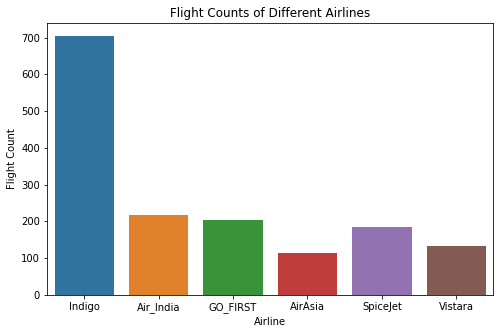

In [30]:
plt.figure(figsize = (8, 5))
sns.countplot(x = df_grouped.airline)
plt.title('Flight Counts of Different Airlines')
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.show();

In [32]:
df_grouped2 = df1.groupby(['flight', 'airline','class'], as_index = False).count()
df_grouped2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

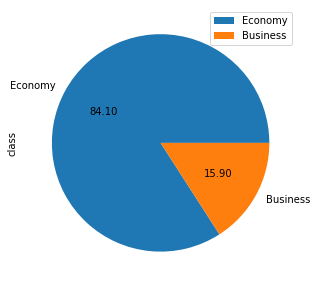

In [36]:
plt.figure(figsize = (8,5))
df_grouped2['class'].value_counts().plot(kind = 'pie', autopct = "%.2f")
plt.legend(['Economy','Business'])
plt.show()

Does price vary with airlines? Let's look at boxplot to understand this!

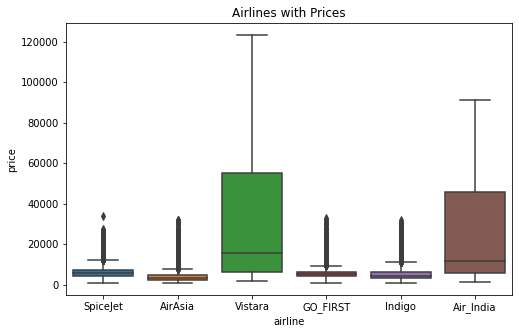

In [38]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df1, x="airline", y="price")
plt.title("Airlines with Prices")
plt.show()

Vistara and Air India is the most expensive price when compared to other airline companies

How does the ticket price vary between Economy and Business class?

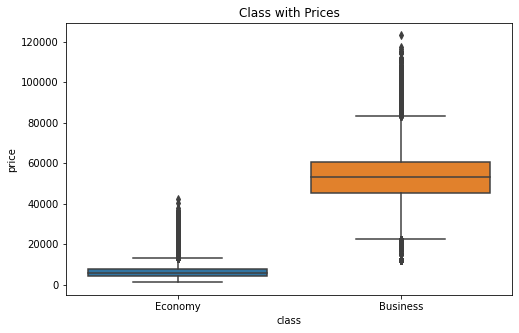

In [42]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df1, x="class", y="price")
plt.title("Class with Prices")
plt.show()

How does the ticket price vary with the number of stops of a flight?

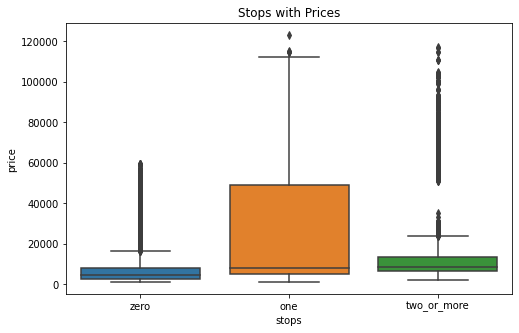

In [43]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df1, x="stops", y="price")
plt.title("Stops with Prices")
plt.show()

How the ticket price change based on the departure time and arrival time?

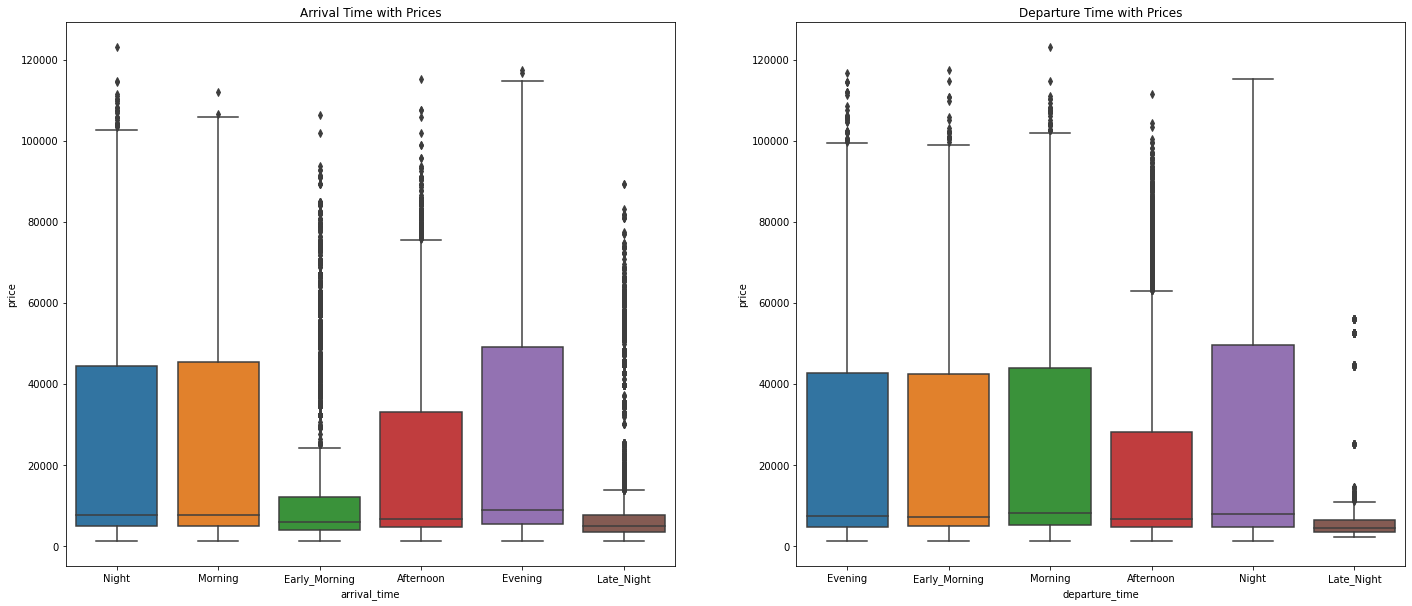

In [46]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=df1, x="arrival_time", y="price")
plt.title("Arrival Time with Prices")
plt.subplot(1,2,2)
sns.boxplot(data=df1, x="departure_time", y="price")
plt.title("Departure Time with Prices")
plt.show()

How the price changes with change in source city and Destination city?

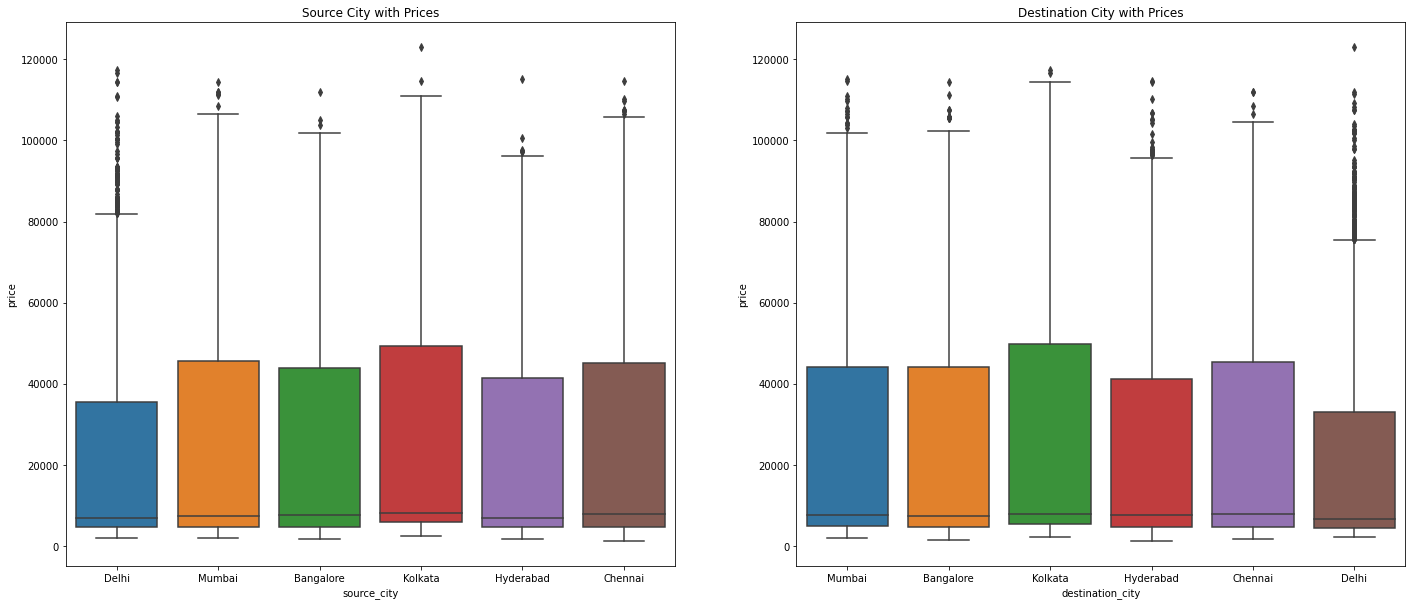

In [47]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=df1, x="source_city", y="price")
plt.title("Source City with Prices")
plt.subplot(1,2,2)
sns.boxplot(data=df1, x="destination_city", y="price")
plt.title("Destination City with Prices")
plt.show()

How the price varies with the flight duration based on class?

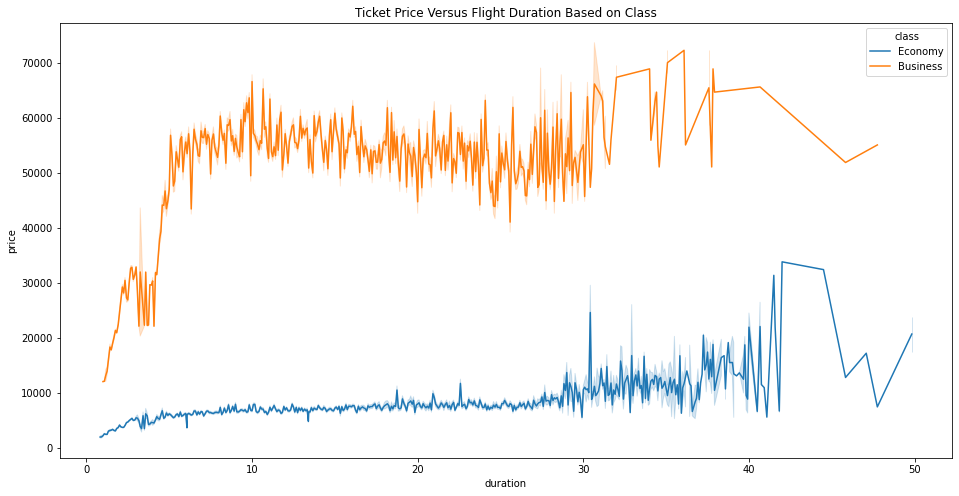

In [48]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = df1, x = 'duration', y= 'price', hue = 'class')
plt.title('Ticket Price Versus Flight Duration Based on Class')
plt.show()

In [41]:
df1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


How is the price affected on the days left for departure?

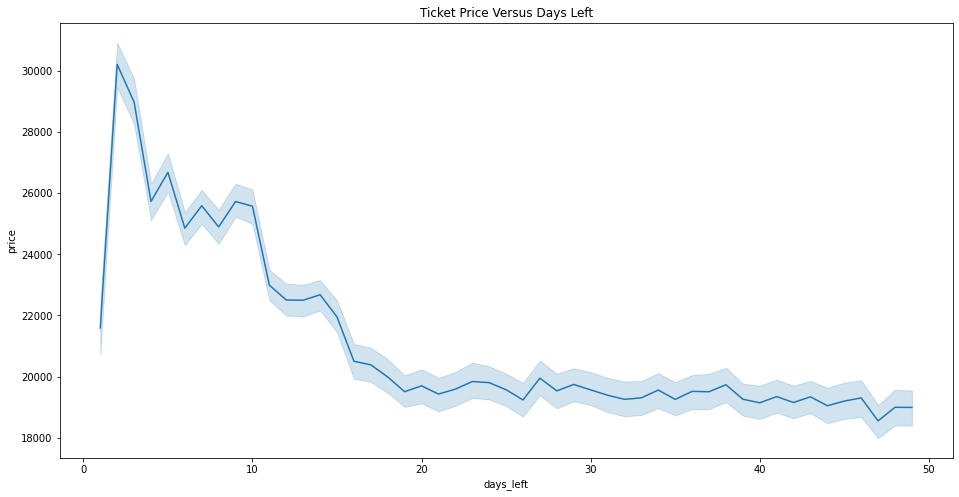

In [49]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = df1, x = 'days_left', y= 'price')
plt.title('Ticket Price Versus Days Left')
plt.show()

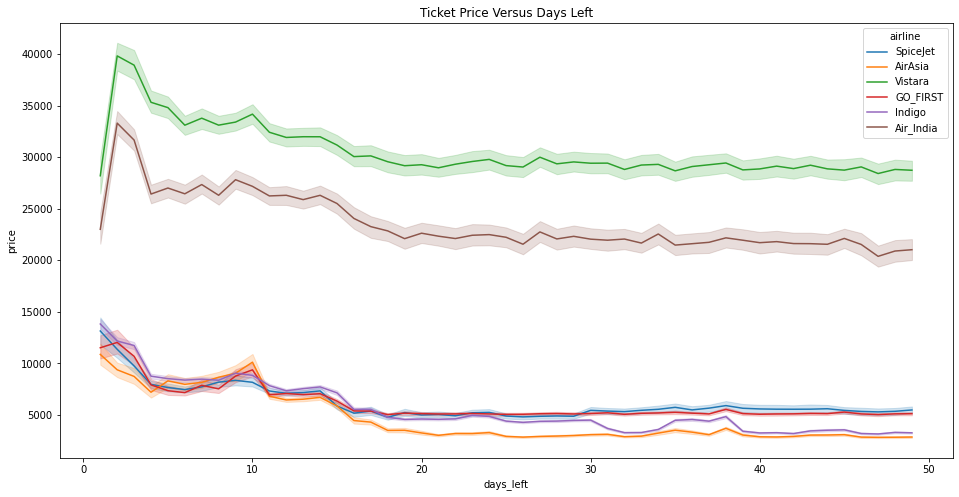

In [50]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = df1, x = 'days_left', y= 'price', hue = 'airline')
plt.title('Ticket Price Versus Days Left')
plt.show()

Total number of flights from one city to another

In [60]:
df1.groupby(['flight','source_city','destination_city','airline','class'], as_index = False).count().groupby(['source_city','destination_city'], as_index = False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


Average price of different airlines from source city to destination city

In [63]:
df1.groupby(['airline','source_city','destination_city'], as_index = False)['price'].mean().head()

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350


In [64]:
# Creating a backup file
df_bu = df1.copy()

In [65]:
# Converting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_bu.columns:
    if df_bu[col].dtype == 'object':
        df_bu[col] = le.fit_transform(df_bu[col])

In [66]:
df_bu.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [67]:
# storing the dependent variables in X and Independent Variable in Y
x = df_bu.drop(['price'], axis = 1)
y = df_bu['price']

In [69]:
# Splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((210107, 10), (210107,), (90046, 10), (90046,))

In [70]:
# Scaling the values to convert the int values to Machine Learning
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range = (0, 1))
x_train = mmscaler.fit_transform(x_train)
x_test = mmscaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [71]:
cols_dict = {'Model Name' : [],
             'Mean_Absolute_Error_MAE' : [],
             'Adj_R_Square' : [],
             'Root_Mean_Squared_Error_RMSE' : [],
             'Mean_Absolute_Percentage_Error_MAPE' : [],
             'Mean_Squared_Error_MSE' : [],
             'Root_Mean_Squared_Log_Error_RMSLE' : [],
             'R2_Score' : []}
results = pd.DataFrame(cols_dict)
results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_Score


### Building Models

In [75]:
# Build the regression / regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of regression models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor()
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelL = Lasso(alpha = 0.1)

modelGBR = GradientBoostingRegressor()

# Evaluation matrix for all algorithms

MM = [modelmlg, modeldcr, modelbag, modelSVR, modelXGR, modelKNN, modelETR, modelRE, modelL, modelGBR]
for model in MM:
    
    # fitting model
    model.fit(x_train, y_train)
    
    # predicting model with test data
    y_pred = model.predict(x_test)
    
    # print the model name
    print('Model name', model)
    
    # Evaluation metrics for Regression analysis
    
    from sklearn import metrics
    
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y_test, y_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error
    
    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')
    
    # Calculate Adjusted R Squared values
    r_squared = round(metrics.r2_score(y_test, y_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y)-1) / (len(y)-x.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Model Name' : model,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y_test, y_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
             'R2_Score' : metrics.r2_score(y_test, y_pred)}
    results = results.append(new_row, ignore_index = True)

Model name LinearRegression()
Mean Absolute Error (MAE):  4630.296
Mean Squared Error (MSE):  49070241.265
Root Mean Squared Error (RMSE):  7005.015
R2 Score:  0.90466
Root Mean Squared Log Error (RMSLE):  8.854
Mean Absolute Percentage Error (MAPE):  43.89 %
Adjusted R Square:  0.904653
-------------------------------------------------------------------------
Model name DecisionTreeRegressor()
Mean Absolute Error (MAE):  1262.719
Mean Squared Error (MSE):  13794040.127
Root Mean Squared Error (RMSE):  3714.033
R2 Score:  0.9732
Root Mean Squared Log Error (RMSLE):  8.22
Mean Absolute Percentage Error (MAPE):  8.62 %
Adjusted R Square:  0.973197
-------------------------------------------------------------------------
Model name BaggingRegressor()
Mean Absolute Error (MAE):  1194.474
Mean Squared Error (MSE):  8718387.303
Root Mean Squared Error (RMSE):  2952.692
R2 Score:  0.98306
Root Mean Squared Log Error (RMSLE):  7.99
Mean Absolute Percentage Error (MAPE):  8.18 %
Adjusted R Squa